In [1]:
using FileIO, Images, VideoIO, Statistics
# https://juliaio.github.io/VideoIO.jl/stable/reading/

In [2]:
vid = VideoIO.openvideo("../Cu_Current_3.mp4")

VideoReader(...)

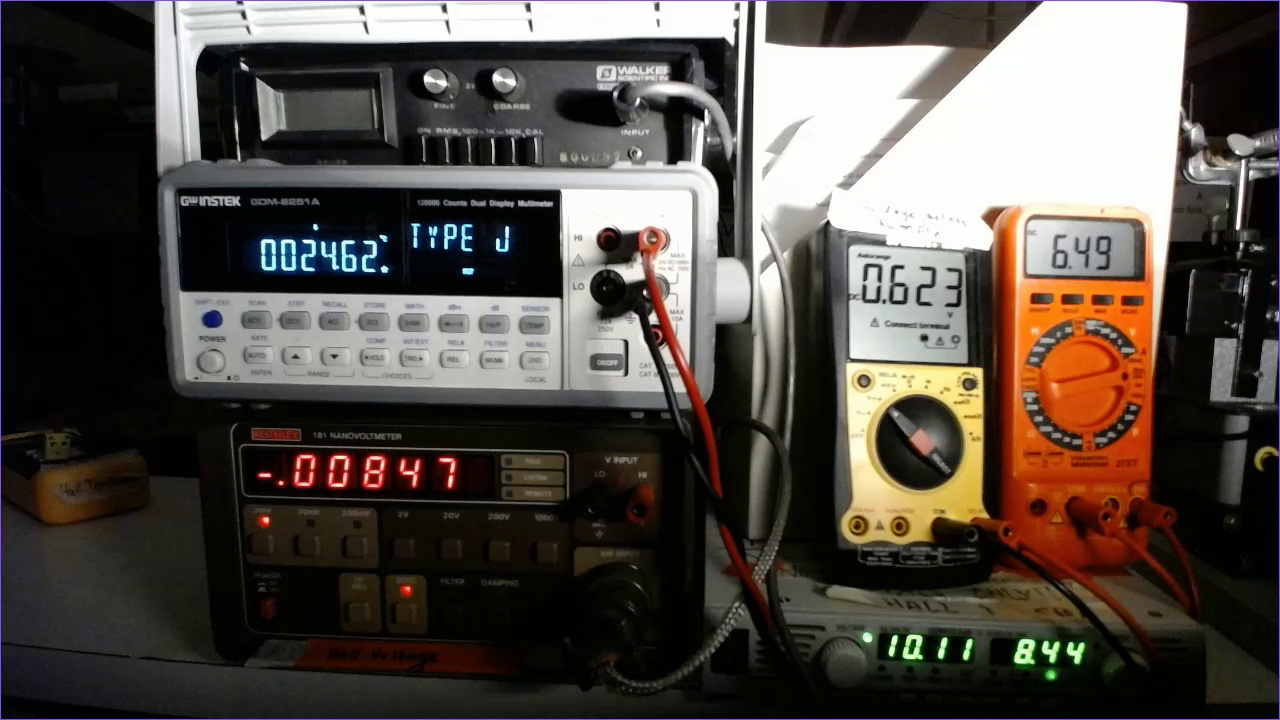

In [192]:
VideoIO.seek(vid,33) |> first

In [4]:
# VideoIO.skipframes(vid,20)
VideoIO.counttotalframes(vid)

996

In [161]:
VideoIO.seekstart(vid)
A =Vector{Matrix{Float64}}[];
v = read(vid)
while !eof(vid)
    read!(vid,v)
    scaleFactor =3/2
    mew = [
        imresize(v[450:494,(220:249) .+ i*35] .|> Gray .|> X->(Int16∘round)(Float16(X),digits=0)/scaleFactor .|> Gray,ratio=2/3) .|> X -> round(scaleFactor*Float64(X),digits=0)
    for i in 1:6] 
    push!(A,mew)
    # VideoIO.skipframes(vid,0,throwEOF=false)
end



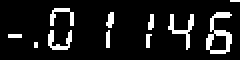

In [162]:
[Gray.(X) for X in A[rand(begin:end)]] |> Y->mosaicview(Y...;nrow=1)

In [163]:
meow = [[Matrix{Int16}(X[Y]) for X in A] for Y in eachindex(first(A))]# |> X->(X[6]) #.|> X -> Gray.(X);

In [175]:
secondDatMat = (
(meow[2] .|> X -> reshape(X,600)) |> X -> reduce(hcat,X)
)';

In [176]:
using LinearAlgebra

In [177]:
(eigvecs(cov(secondDatMat))) * diagm(eigvals(cov(secondDatMat))) * (eigvecs(cov(secondDatMat))') - cov(secondDatMat) |> X -> mean(abs,X)

2.1598624654078854e-19

In [178]:
using Plots

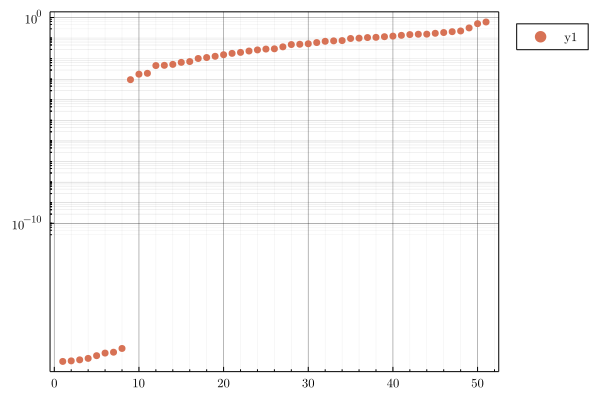

In [180]:
scatter(eigvals(cov(secondDatMat))[end-50:end],yscale=:log10)

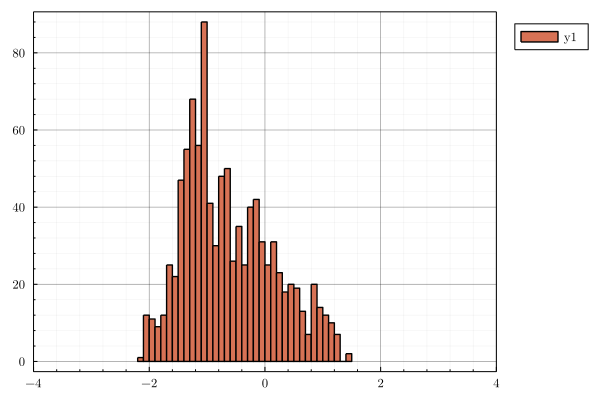

In [182]:
histogram((secondDatMat * eigvecs(cov(secondDatMat)))[:,end],bins=60,xlim=(-4,4))

In [183]:
using StatsPlots

In [184]:
theme(:dao)

In [185]:
XX=(eigvecs(cov(secondDatMat))' * cov(secondDatMat) * eigvecs(cov(secondDatMat)))[1,:];

In [186]:
minimum(XX)

-1.3670126875482654e-17

In [187]:
maximum(eigvals(cov(secondDatMat)))

0.6027119072392122

In [31]:
(eigvecs(cov(secondDatMat))) * diagm(eigvals(cov(secondDatMat))) * (eigvecs(cov(secondDatMat))') - cov(secondDatMat) |> X -> sum(abs2,X)

2.8498586084647583e-26

In [189]:
reduce(vcat,meow[1])

29850×20 Matrix{Int16}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 ⋮              ⋮              ⋮              ⋮           
 0  0  0  0  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0

In [355]:
using DelimitedFiles

open("test.csv","w") do io
    writedlm(io,reduce(vcat,meow[1]))
end